<a href="https://colab.research.google.com/github/atul1994s/airbnb/blob/main/Airbnb_NYC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Airbnb NYC 2019 Analysis**

Project Type - EDA

Contribution - Indivisual

Name - Atul Singh

# **Project Summary - Airbnb Data Analysis**




Since 2008, Airbnb has revolutionized travel experiences by offering a unique, personalized way to explore the world. With millions of listings worldwide, Airbnb has become a globally recognized platform for both guests and hosts. Data analysis plays a pivotal role in leveraging the vast amount of data generated by these listings.

The dataset for this analysis comprises approximately 49,000 observations across 16 columns, encompassing a mix of categorical and numeric values. The objective of this project is to delve into the data to uncover key insights and understandings that can drive various aspects of Airbnb's operations:

**Security:** Analyze patterns and trends to enhance security measures for guests and hosts.

B**usiness Decisions:** Use data-driven insights for strategic decision-making processes within the company.

**Customer and Host Behavior:** Understand the behaviors and preferences of customers and hosts on the platform.

**Performance Analysis:** Evaluate the performance of hosts and their listings to optimize platform efficiency.

**Marketing Initiatives:** Guide marketing strategies based on data-driven customer insights.

**Innovative Services:** Identify opportunities for introducing innovative services to enhance user experience.

By exploring and analyzing the Airbnb dataset, this project aims to extract actionable insights that can drive improvements across various aspects of the Airbnb platform, ultimately enhancing the overall user experience and business operations.

# **GitHub Link -**


Atul Singh :-https://github.com/atul1994s/airbnb

#Problem Statement

**Market Overview:** Conduct an overview of the Airbnb market in NYC, including the number of listings, hosts, and reviews, as well as the distribution of listing types and neighborhoods.

**Price Analysis:** Analyze the pricing trends of Airbnb listings in different neighborhoods and property types. Identify the factors influencing listing prices and provide recommendations for hosts to optimize pricing strategies.

**Host Analysis:** Examine the characteristics of hosts, such as host experience, response rate, and host types (superhosts vs. regular hosts). Identify the factors contributing to host success and provide suggestions for improving host performance.

**Guest Satisfaction:** Evaluate guest satisfaction based on review ratings and sentiments. Identify the key factors influencing guest satisfaction and recommend ways to enhance the guest experience.

**Seasonal Trends:** Investigate seasonal trends in Airbnb demand and pricing. Identify peak seasons and recommend strategies for hosts to capitalize on seasonal fluctuations.

**Neighborhood Analysis:** Compare different neighborhoods in NYC in terms of popularity, pricing, and guest satisfaction. Provide insights into the unique characteristics of each neighborhood and recommendations for travelers.

**Regulatory Impact:** Assess the impact of regulatory changes on the Airbnb market in NYC and analyze how it has influenced listing availability, prices, and host behavior.

# ***Let's Begin !***


1. **Importing Necessary Library for project**

In [36]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
import folium

2. **Importing DATASET**

In [37]:
#improting drive for csv file access.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#assigning file as database(db01)

db01='/content/drive/My Drive/alma project/Airbnb NYC 2019.csv'

#creating dataframe
airbnb_df=pd.read_csv(db01)


**Understanding DATASET**

In [39]:
#checking the size of the airbnb_df
print("Size of DataFrame : ",airbnb_df.size)

# checking the shape of Dataframe
airbnb_df = pd.DataFrame(airbnb_df)
rows, columns = airbnb_df.shape
print("Rows : ", rows, "\nColumns : ", columns)


Size of DataFrame :  782320
Rows :  48895 
Columns :  16


In [40]:
#checking datatype for dataframe
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#3. **DATA CLEANING** / **FILLING MISSING VALUES**

In [41]:
# Counting the number of null values or empty cells in each column
null_counts = airbnb_df.isnull().sum()
empty_counts = (airbnb_df == '').sum()

# Print the counts
print("Null Value Counts:")
print(null_counts)
print("\nEmpty Cell Counts:")
print(empty_counts)

Null Value Counts:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Empty Cell Counts:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type           

In [42]:
# Calculate the mean of reviews_per_month
mean_review = airbnb_df['reviews_per_month'].mean()

# Fill null values in column reviews_per_month with the mean value
airbnb_df['reviews_per_month'].fillna(mean_review, inplace=True)

#checking aggain null for null values
null_counts = airbnb_df.isnull().sum()

# Print the counts after null values replaced
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [43]:
# Converting the 'last_review' column from object to date type
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

# after converting checking the data type
print('DATA TYPE:')
print(airbnb_df.dtypes)


DATA TYPE:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [44]:
# Drop rows with null values in column name & host_name
airbnb_df.dropna(subset=['name', 'host_name'], inplace=True)

# Fill null values with the most recent date
most_recent_date = airbnb_df['last_review'].max()
airbnb_df['last_review'].fillna(most_recent_date, inplace=True)

# checking size of dataframe after dropping null values and replace them
print('size of Data Frame:', airbnb_df.size)


# drop duplicate value in airbnb_df
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)

# checking the shape of Dataframe
airbnb_df = pd.DataFrame(airbnb_df)

print(airbnb_df.info())


size of Data Frame: 781728
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  

In [45]:
# fetching head of airbnb_df
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-08,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [46]:
#tail of airbnb_df
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,2019-07-08,1.373221,1,23


In [47]:
#getting thoes colunms which is required for analysis of hosts
airbnb_df_new=airbnb_df.loc[:,['host_id','host_name','price','number_of_reviews','latitude','longitude','reviews_per_month','room_type','availability_365','minimum_nights','neighbourhood_group','neighbourhood']]
airbnb_df_new

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
0,2787,John,149,9,40.64749,-73.97237,0.210000,Private room,365,1,Brooklyn,Kensington
1,2845,Jennifer,225,45,40.75362,-73.98377,0.380000,Entire home/apt,355,1,Manhattan,Midtown
2,4632,Elisabeth,150,0,40.80902,-73.94190,1.373221,Private room,365,3,Manhattan,Harlem
3,4869,LisaRoxanne,89,270,40.68514,-73.95976,4.640000,Entire home/apt,194,1,Brooklyn,Clinton Hill
4,7192,Laura,80,9,40.79851,-73.94399,0.100000,Entire home/apt,0,10,Manhattan,East Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,70,0,40.67853,-73.94995,1.373221,Private room,9,2,Brooklyn,Bedford-Stuyvesant
48891,6570630,Marisol,40,0,40.70184,-73.93317,1.373221,Private room,36,4,Brooklyn,Bushwick
48892,23492952,Ilgar & Aysel,115,0,40.81475,-73.94867,1.373221,Entire home/apt,27,10,Manhattan,Harlem
48893,30985759,Taz,55,0,40.75751,-73.99112,1.373221,Shared room,2,1,Manhattan,Hell's Kitchen


In [48]:
#checking null values or missing data
airbnb_df_new.isnull().sum()

host_id                0
host_name              0
price                  0
number_of_reviews      0
latitude               0
longitude              0
reviews_per_month      0
room_type              0
availability_365       0
minimum_nights         0
neighbourhood_group    0
neighbourhood          0
dtype: int64

**cleaning DATA**

In [49]:
#we have clean data now
print(type(airbnb_df_new["host_id"]))
print(type(airbnb_df_new['host_name']))
print(type(airbnb_df_new["availability_365"]))
print(type(airbnb_df_new["number_of_reviews"]))
print(type(airbnb_df_new["reviews_per_month"]))
print(type(airbnb_df_new["price"]))
print(type(airbnb_df_new['neighbourhood_group']))
print(type(airbnb_df_new['neighbourhood']))
print(type(airbnb_df_new['room_type']))
print(type(airbnb_df_new['latitude']))
print(type(airbnb_df_new['longitude']))
print(type(airbnb_df_new['minimum_nights']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**Checking if any null valvue is in new DATA frame**

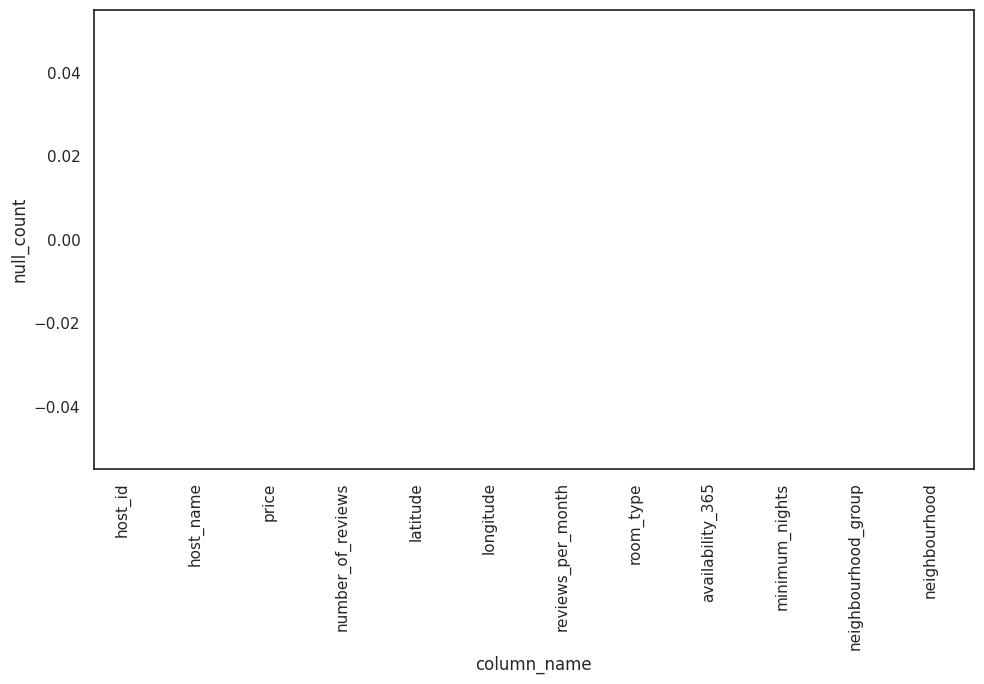

In [50]:
j = airbnb_df_new.isnull().sum()
df3 = pd.DataFrame({'column_name':j.index, 'null_count':j.values})
plt.figure(figsize=(10,7))
ax = sns.barplot(x="column_name",y='null_count',data=df3)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

**In Above visualization is the result of the entire data cleaning process where no NaN values are present in the dataset**

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Q. Which Location has most airbnb count?



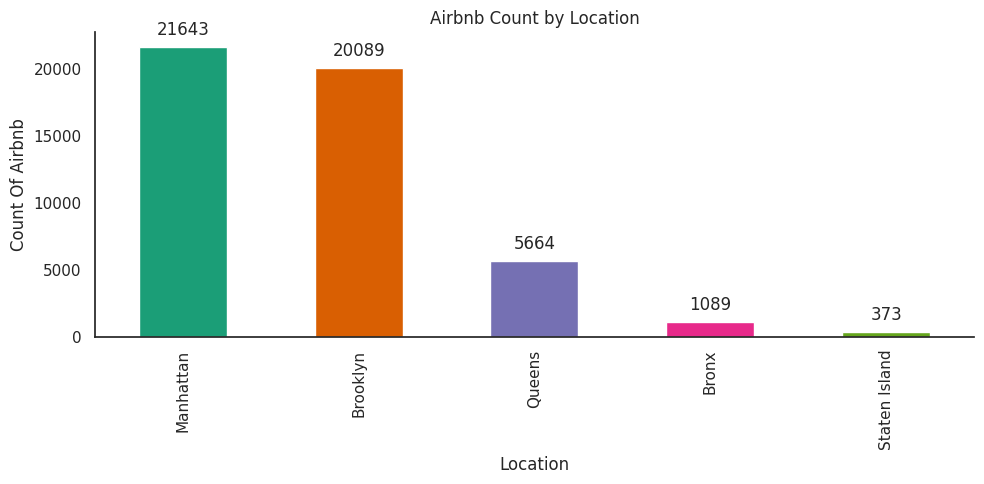

In [51]:
plt.figure(figsize=(10,5))
pb=airbnb_df_new.groupby('neighbourhood_group').size().sort_values(ascending = False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels on the bars
for p in pb.patches:
    pb.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 12),
                  textcoords = 'offset points')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Count Of Airbnb')
plt.title("Airbnb Count by Location")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

**Checking which Neighborhood getting more booking using Airbnb
From this visualization, we can draw the following conclusions:**


***Hightlights***
* Manhattan has the highest count of Airbnb listings among all the neighborhood groups, with over 20,000 listings.
* Brooklyn has the second-highest count, followed by Queens.
* Staten Island and Bronx have the lowest counts of Airbnb listings among the neighborhood groups.

Overall, this visualization provides insights into the distribution of Airbnb listings across different neighborhood groups in terms of the count of listings. It highlights the popularity of Manhattan as a location for Airbnb listings compared to other areas.

# Q. which room type get most review per month according location ?



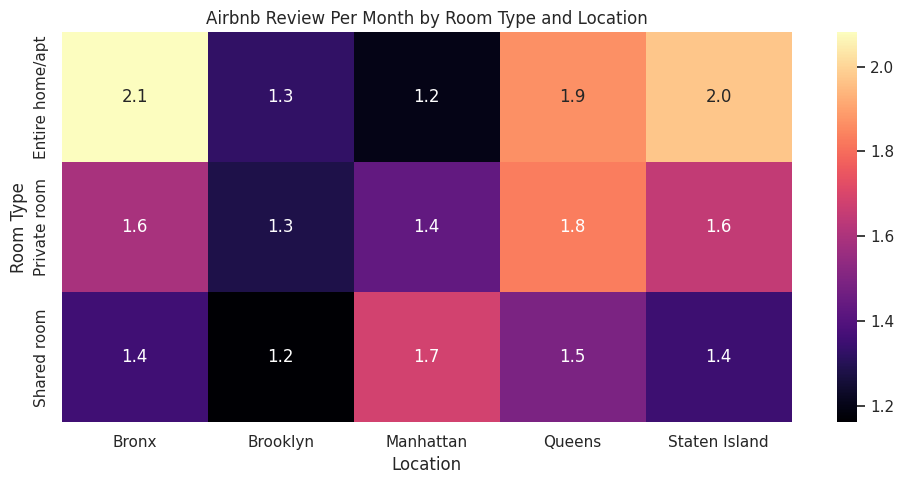

In [52]:
# Pivot the DataFrame to prepare it for the heatmap
heatmap_data = airbnb_df_new.pivot_table(index='room_type', columns='neighbourhood_group', values='reviews_per_month', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the heatmap with data values displayed
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='magma')

plt.xlabel('Location')
plt.ylabel('Room Type')
plt.title('Airbnb Review Per Month by Room Type and Location')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()



By observing the Heatmap, we can see the distribution of reviews per month across different room types and Locations.
For example, in Brooklyn and Manhattan, Entire home/apartment listings tend to have higher numbers of reviews per month compared to Private room and Shared room listings. However, in Staten Island and Bronx, the number of reviews per month is generally lower across all room types.
This visualization provides insights into the popularity of different types of accommodations across different Locations in terms of the number of reviews they receive per month.

***Same review using Bar plot**


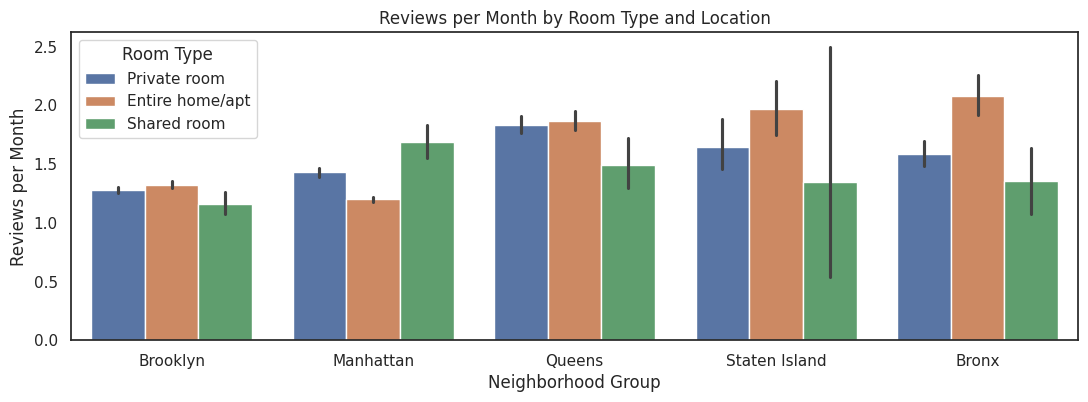

In [53]:
# Create a scatterplot with reviews_per_month on the y-axis, room_type on the x-axis, and colored by neighbourhood_group

plt.figure(figsize=(13,4))
sns.barplot(data=airbnb_df_new, y="reviews_per_month", x="neighbourhood_group", hue="room_type")

# Add title and labels
plt.title("Reviews per Month by Room Type and Location")
plt.xlabel("Neighborhood Group")
plt.ylabel("Reviews per Month")
plt.legend(title='Room Type')

# Show the plot
plt.show()

By observing the plot, we can see the distribution of reviews per month across different room types and Locations. For example, in Brooklyn and Manhattan, Entire home/apartment listings tend to have higher numbers of reviews per month compared to Private room and Shared room listings. However, in Staten Island and Bronx, the number of reviews per month is generally lower across all room types. This visualization provides insights into the popularity of different types of accommodations across different Locations in terms of the number of reviews they receive per month.

# Q. Which Room type less preference?


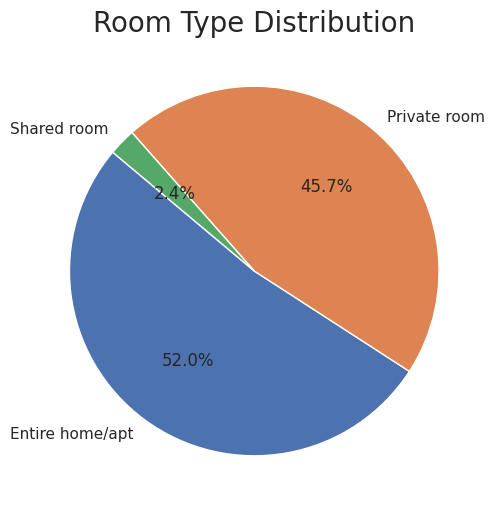

In [54]:
# Calculate the frequency of each room type
roomtype_freq = airbnb_df_new['room_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomtype_freq, labels=roomtype_freq.index, autopct='%1.1f%%', startangle=140)

plt.title('Room Type Distribution', fontsize=20)
plt.show()

**Highlights**

From this visualization, we can draw the following conclusions:

* Shared rooms have the highest average availability, with approximately 161.83 days on average.
* Entire home/apartments have slightly lower average availability compared to Shared rooms, with approximately 111.91 days on average.
* Private rooms have the lowest average availability among the three types, with approximately 111.26 days on average.

Overall, this visualization provides insights into the average availability of different types of Airbnb listings, indicating that Shared rooms tend to have the highest availability compared to Private rooms and Entire home/apartments.

#Q. Which Location have most Availability ?

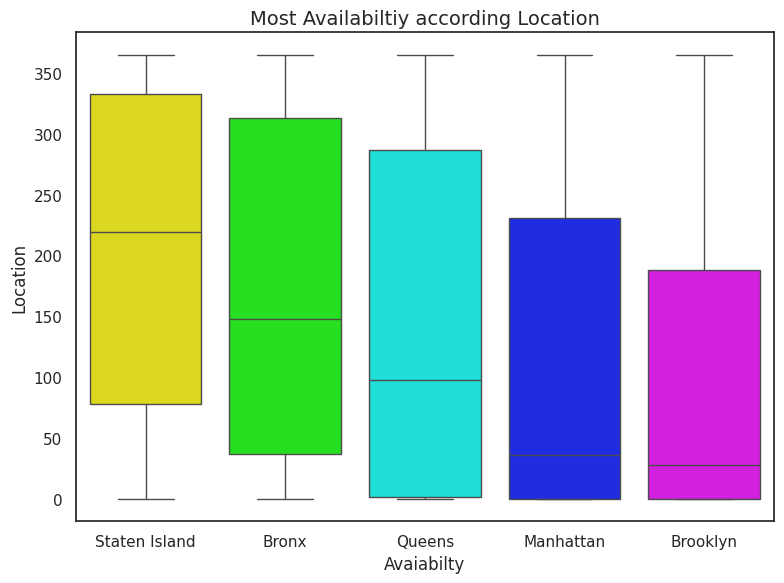

In [119]:
# Creating bar plot for Availability according Location
plt.figure(figsize=(8, 6))
order = airbnb_df_new.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False).index
pb = sns.boxplot(x='neighbourhood_group', y='availability_365', data=airbnb_df_new, order=order, palette='hsv')


plt.title('Most Availabiltiy according Location', fontsize= 14)
plt.xlabel('Avaiabilty', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

By comparing the lengths and positions of the boxes across different boroughs, one can observe variations in availability.
The median availability, represented by the line inside each box, gives a sense of the typical availability of listings in each location.
The presence of outliers outside the whiskers may signify unusual or extreme availability values for specific locations.
Overall, this visualization provides insights into the distribution of Airbnb listing availability across various boroughs in NYC, aiding in understanding the rental market dynamics in different areas.

#Q. Does the amount of monthly reviews a listing receives have an affect on price?

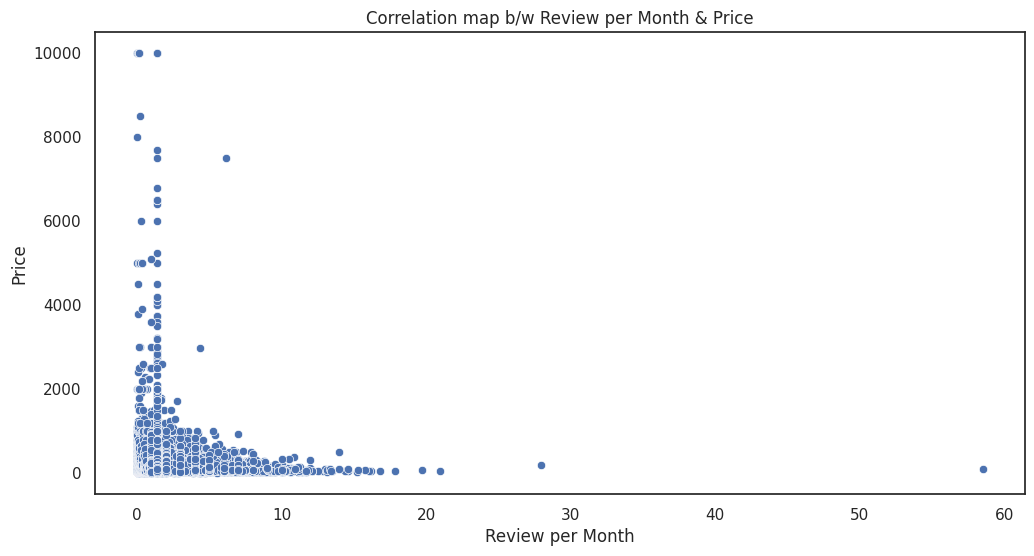

In [97]:
sns.scatterplot(x='reviews_per_month', y='price', data=airbnb_df_new)
plt.title('Correlation map b/w Review per Month & Price')
plt.xlabel('Review per Month')
plt.ylabel('Price')
plt.show()


Question was altered from: Does the amount of listings a host has affect how many reviews they receive? (more experienced hosters possibly receiving more reviews).  Because when initially plotting reviews_per_month against host_listings_count, the result was a plot that had zero potential to be somewhat accurately clustered.

# Q. which Area according price is more preferable using longitude & latitude ?


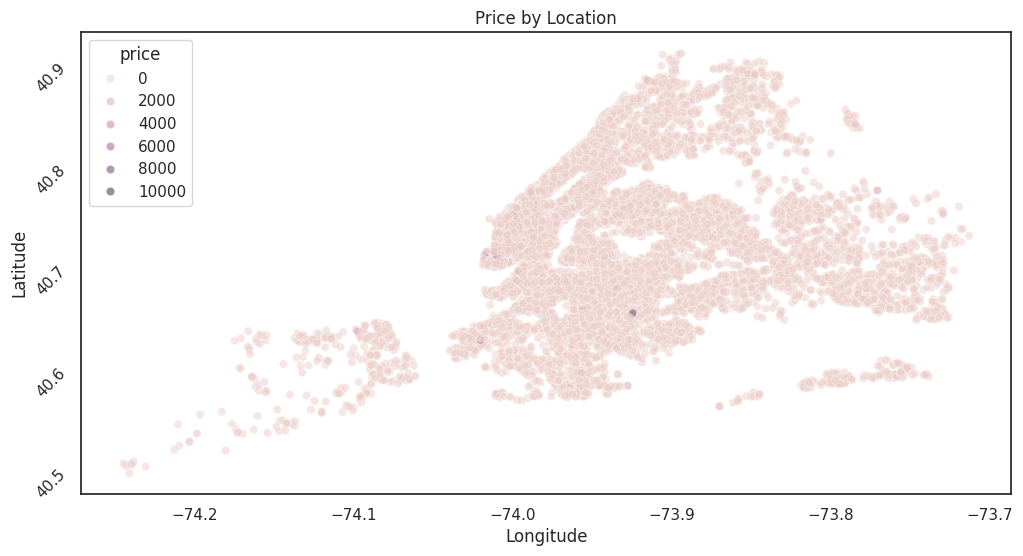

In [56]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airbnb_df_new, x="longitude", y="latitude", hue="price", alpha=.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(rotation=45, ha='right')
plt.title("Price by Location")
plt.show()

There is a wide range of prices among Airbnb listings, ranging from low-priced to high-priced accommodations.
Listings with higher prices are scattered across different locations, but there seems to be a concentration of higher-priced listings in certain areas, especially in the central region of the plotted area.
Lower-priced listings are more uniformly distributed across the plotted area.
The density of listings varies across different regions, with some areas having a higher concentration of listings compared to others.

**Overall, this scatter plot provides insights into the spatial distribution of Airbnb listings and how prices vary across different locations.**

# New DataFrame created for New Variables

In [57]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df_new[airbnb_df_new['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
25794,86327101,Adeyemi,0,93,40.68173,-73.91342,4.280000,Private room,176,1,Brooklyn,Bedford-Stuyvesant
25795,86327101,Adeyemi,0,95,40.68279,-73.91170,4.370000,Private room,232,1,Brooklyn,Bedford-Stuyvesant
25796,86327101,Adeyemi,0,95,40.68258,-73.91284,4.350000,Private room,222,1,Brooklyn,Bedford-Stuyvesant
21700,33511962,Morgan,10,0,40.81302,-73.95349,1.373221,Shared room,0,1,Manhattan,Harlem
22835,97001292,Maria,10,43,40.69085,-73.79916,1.680000,Entire home/apt,252,1,Queens,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,3750764,Kevin,6800,0,40.75060,-74.00388,1.373221,Entire home/apt,364,1,Manhattan,Chelsea
42523,7407743,Jack,7500,0,40.71162,-74.01693,1.373221,Entire home/apt,364,1,Manhattan,Battery Park City
45666,262534951,Sandra,7500,8,40.65724,-73.92450,6.150000,Private room,179,1,Brooklyn,East Flatbush
29662,156158778,Sally,7703,0,40.76824,-73.95989,1.373221,Entire home/apt,146,1,Manhattan,Upper East Side


In [58]:
#Get the number of values which price is less than 100$
print('Less then 100$ price :')
print(airbnb_df_new.loc[airbnb_df['price'] < 100,'price'].count())


#Make a copy of original dataframe to perform additional operation for get the desire result
price_df = airbnb_df_new.copy()


#Find the mean value of price which value is less than 100$
print('mean price for less than 100$ is :')
print(round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()))


#Count how many rows have amount = 0$
print("With 0$ price :")
print(price_df[price_df['price']==0].count())


Less then 100$ price :
21861
mean price for less than 100$ is :
65
With 0$ price :
host_id                11
host_name              11
price                  11
number_of_reviews      11
latitude               11
longitude              11
reviews_per_month      11
room_type              11
availability_365       11
minimum_nights         11
neighbourhood_group    11
neighbourhood          11
dtype: int64


In [59]:
#Find the observations where price is 0$
price_df[price_df['price']==0]

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
23161,8993084,Kimberly,0,1,40.69023,-73.95428,0.050000,Private room,28,4,Brooklyn,Bedford-Stuyvesant
25433,131697576,Anisha,0,55,40.83296,-73.88668,2.560000,Private room,127,2,Bronx,East Morrisania
25634,15787004,Martial Loft,0,16,40.69467,-73.92433,0.710000,Private room,0,2,Brooklyn,Bushwick
25753,1641537,Lauren,0,12,40.72462,-73.94072,0.530000,Private room,0,2,Brooklyn,Greenpoint
25778,10132166,Aymeric,0,3,40.70838,-73.94645,0.150000,Entire home/apt,73,5,Brooklyn,Williamsburg
25794,86327101,Adeyemi,0,93,40.68173,-73.91342,4.280000,Private room,176,1,Brooklyn,Bedford-Stuyvesant
25795,86327101,Adeyemi,0,95,40.68279,-73.91170,4.370000,Private room,232,1,Brooklyn,Bedford-Stuyvesant
25796,86327101,Adeyemi,0,95,40.68258,-73.91284,4.350000,Private room,222,1,Brooklyn,Bedford-Stuyvesant
26259,13709292,Qiuchi,0,0,40.75091,-73.97597,1.373221,Entire home/apt,0,3,Manhattan,Murray Hill
26841,101970559,Sergii,0,2,40.69211,-73.90670,0.110000,Shared room,333,30,Brooklyn,Bushwick


In [60]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df_new.loc[airbnb_df_new['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

#Replace the value of price according to minimum night where price = 0$
price_df['price'] = np.where(
   (price_df['price'] == 0) ,price_calculator(price_df['minimum_nights']) , price_df['price'])

# What is the relation in Host_id, price, number_of_review & minimum_nights ?


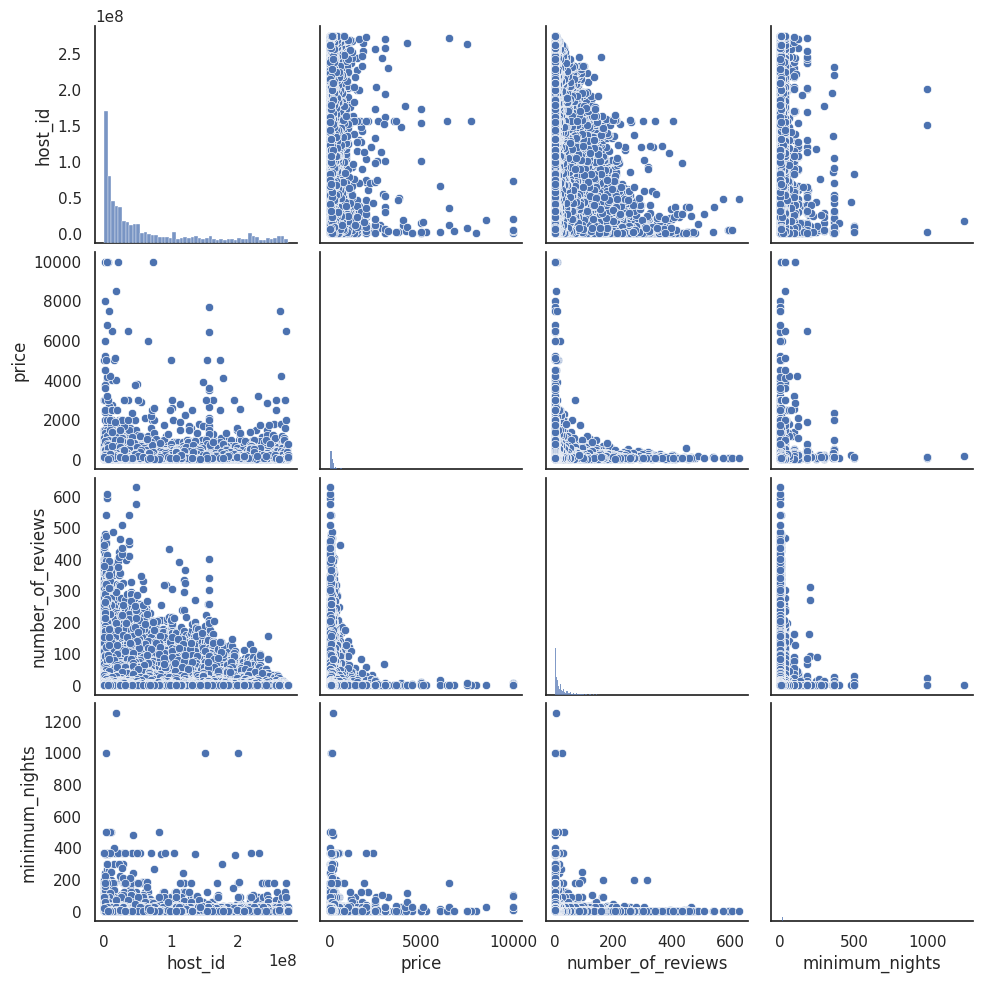

In [127]:
# Our new description of dataset
sns.pairplot(airbnb_df_new[['host_id','price','number_of_reviews','minimum_nights',]])
plt.show()

Host ID vs. Other Variables: The scatter plots in the first row and first column show the relationship between the host ID and other numerical variables. These plots help in understanding the distribution of listings among different hosts and how it relates to other factors like price, number of reviews, and minimum nights.
Price vs. Other Variables: The scatter plots in the second row and second column show the relationship between price and other numerical variables. These plots provide insights into how the price of listings varies with factors such as host ID, number of reviews, and minimum nights.
Number of Reviews vs. Other Variables: The scatter plots in the third row and third column depict the relationship between the number of reviews and other numerical variables. These plots help in understanding how the number of reviews correlates with variables like price, host ID, and minimum nights.
Minimum Nights vs. Other Variables: The scatter plots in the fourth row and fourth column illustrate the relationship between the minimum nights required for booking and other numerical variables. These plots show how the minimum nights policy relates to factors such as price, number of reviews, and host ID.
Overall, this pair plot allows for a comprehensive exploration of the relationships between different numerical variables in the Airbnb dataset, helping to identify patterns and correlations between them

#Q.  What is the price distribution of AirBNB rentals among the five boroughs?

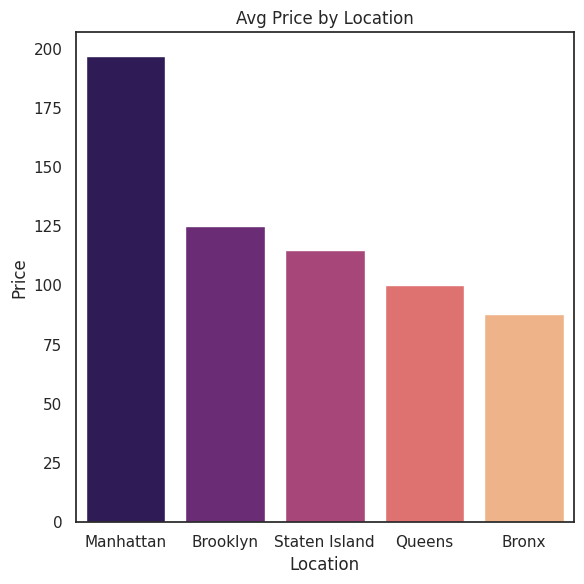

In [90]:
#Set fig size
plt.figure(figsize=(6, 6))

#Get the average rent according to location
avg_price_loc=price_df.groupby('neighbourhood_group',as_index=False)['price'].mean().sort_values(['price'],ascending=False).rename(columns={'price':'average price','neighbourhood_group':'Location'})
avg_price_loc = avg_price_loc.round()
avg_price_loc

# Create subplots

# Plot Avg price by locationaxes
sns.barplot(x='Location', y='average price', data=avg_price_loc, palette='magma')
plt.title('Avg Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


**Answer:** To answer our question, the price distribution of AirBNB rentals across the five buroughs are 197/night in Manhattan, 125/night in Brooklyn, 115/night in Staten Island, 100/night in Queens, and 80/night in the Bronx. As a AirBNB host, its important to know what the average price listings in the area of your listing to see if you are pricing too high or too low. This could prevent extra profits or prevent more rentals. Through our question, we also analyzed what factors tend to affect the price of an AirBNB in each borough the most and the least. From our studies, we've concluded that AirBNB listings that provide the customer an entire home/apartment tended to cause prices to jump, while shared rooms tended to causes prices to dip. This type of information would be very useful for AirBNB hosts struggling to determine the perfect price to their AriBNB and can even assist Real Estate Agents interested in the AirBNB industry to determine what kind of property in which borough they should try to purchase if they are trying to obtain the most profit, which would be Entire homes and apartments.

# **Q.**  How are AirBNB rentals distributed among the five boroughs of New York?

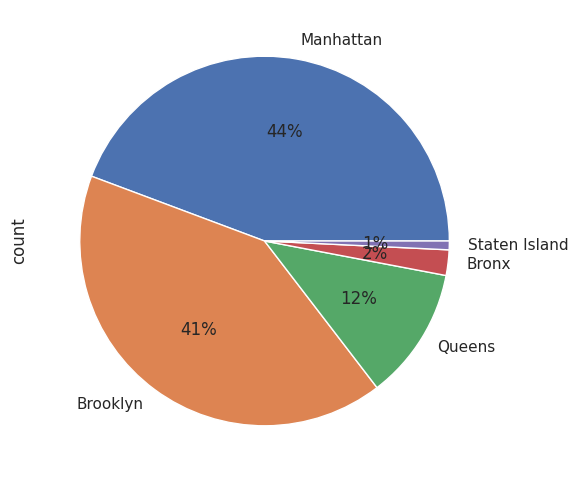

In [73]:
listings = airbnb_df_new['neighbourhood_group'].value_counts()
plot = listings.plot.pie(y='count', figsize=(6, 6), autopct='%1.0f%%')

**Answer:** To answer our question, we can see that 85% of the rentals are distributed across both Manhattan and Brooklyn while Staten Island only represents 1% of the dataset and Bronx represents 2% of the dataset. Although a simple question, this is a very important question we must first answer to see where our team can branch off from this question to ask better questions that'll lead to great answers. This data could be used for people in the Real Estate Industry looking to enter the AirBNB rental industry. From this data, we can see that the most popular places customers enjoy renting are in both Manhattan and Brooklyn and the least popular places to rent are in Staten Island and Bronx. This can be valuable information to a renter who is unsure of which borough they should purchase a property to rent out, which in this case, it would be Manhattan or Brooklyn.

# Q. Which words are more popular on Airbnb ?

In [63]:
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [64]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]

[('in', 16723),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6112),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3770),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3355),
 ('with', 3092),
 ('2', 3078),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2319),
 ('near', 2293),
 ('williamsburg', 2292)]

In [111]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16723), ('the', 3866), ('to', 3826), ('of', 2992), ('-', 2272),('2', 3078), ('1', 3355), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25


#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)

[Text(0, 0, 'room'),
 Text(1, 0, 'bedroom'),
 Text(2, 0, 'private'),
 Text(3, 0, 'apartment'),
 Text(4, 0, 'cozy'),
 Text(5, 0, 'studio'),
 Text(6, 0, 'brooklyn'),
 Text(7, 0, 'apt'),
 Text(8, 0, 'spacious'),
 Text(9, 0, 'with'),
 Text(10, 0, 'east'),
 Text(11, 0, 'and'),
 Text(12, 0, 'manhattan'),
 Text(13, 0, '&'),
 Text(14, 0, 'park'),
 Text(15, 0, 'sunny'),
 Text(16, 0, 'beautiful'),
 Text(17, 0, 'near'),
 Text(18, 0, 'williamsburg'),
 Text(19, 0, 'village'),
 Text(20, 0, 'heart'),
 Text(21, 0, 'large'),
 Text(22, 0, 'loft'),
 Text(23, 0, 'nyc'),
 Text(24, 0, 'central')]

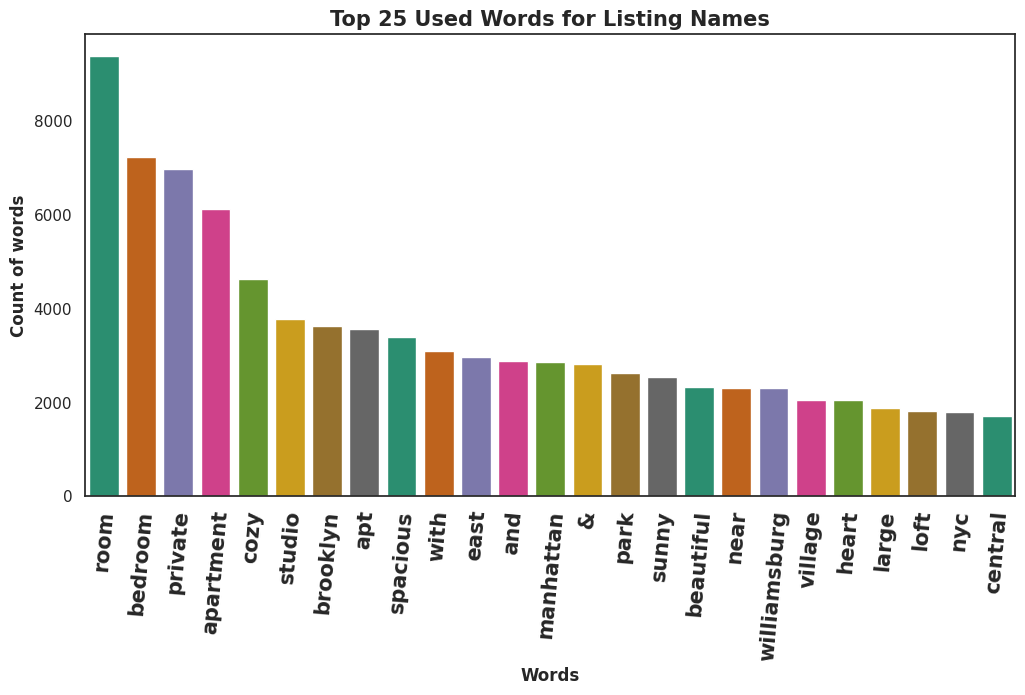

In [66]:
#Setting the figure size
sns.set(rc={'figure.figsize':(12,6)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
count_viz = sns.barplot(x='Words',y='Counts', data = word_count_df, palette='Dark2')

# Naming the Chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight = 'bold').set_fontsize('15')


# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight = 'bold')
count_viz.set_xlabel('Words', weight = 'bold')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 85, weight = 'bold', size = '15')

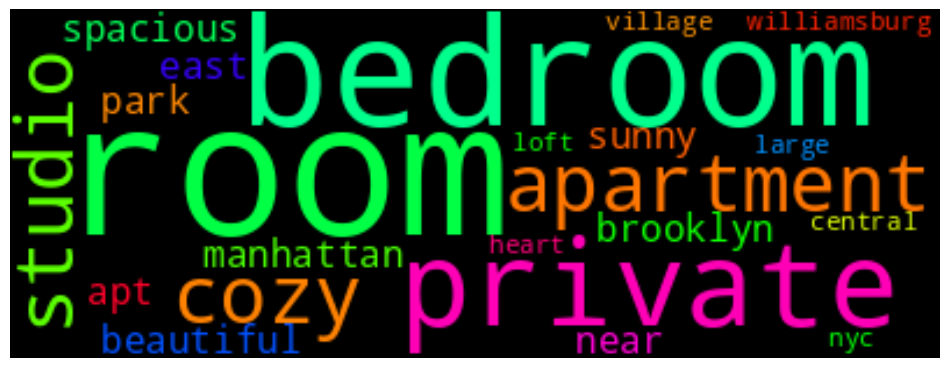

In [67]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Answer** :- From the plot, we can observe that words related to the type of accommodation ("room," "bedroom," "private," "apartment," "studio") are among the most commonly used. Additionally, location-specific words like "Brooklyn," "Manhattan," "east," "and," "park," and "Williamsburg" are also frequent, indicating the importance of location in Airbnb listings. Other descriptive words such as "cozy," "spacious," "sunny," "beautiful," "heart," "village," "large," "loft," "NYC," and "central" are also commonly used to attract potential guests by highlighting desirable features of the accommodations.

# Q."Which Host is the most popular according review?"

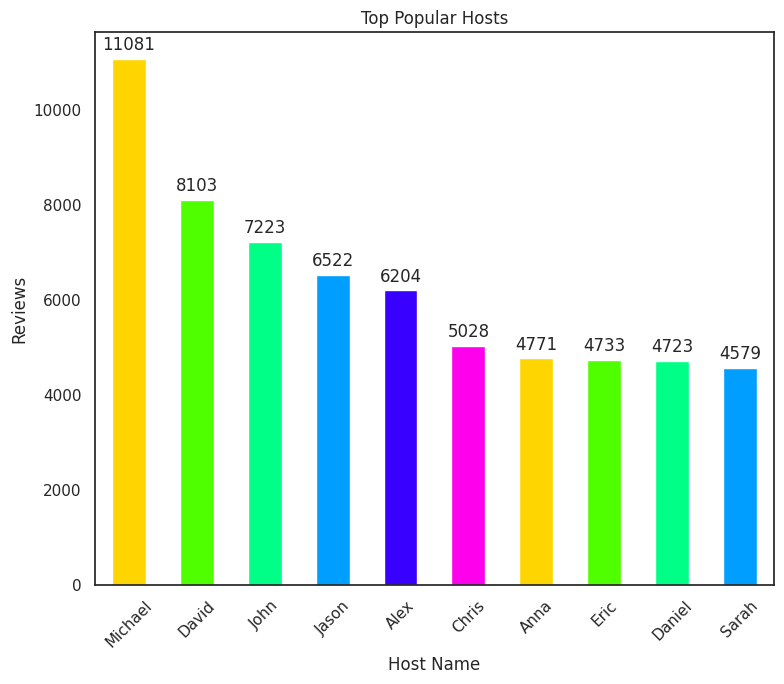

In [113]:
# getting top popular host with ratings
plt.figure(figsize=(8, 7))
top_hosts = airbnb_df_new.groupby('host_name')['number_of_reviews'].sum().nlargest(10).sort_values(ascending=False)
b=top_hosts.plot(kind='bar', x='host_name', y='number_of_reviews', color=sns.palettes.mpl_palette('hsv') )

# Add data labels to the bar plot
for p in b.patches:
    b.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
plt.xlabel('Host Name')
plt.xticks(rotation = 45)
plt.ylabel('Reviews')
plt.title('Top Popular Hosts')
plt.tight_layout()
plt.show()

# Top_Host=pd.DataFrame(top_hosts).rename(columns={'host_name': 'Host', 'number_of_reviews': 'Review count'})
# Top_Host

**Answer** :- Top Popular Hosts: The host named "Michael" has received the highest number of reviews, with a total of 11081 reviews. Following Michael, the hosts "David" and "John" have received 8103 and 7223 reviews, respectively. These hosts are the top three popular hosts based on the number of reviews they have received.
Other Hosts: The remaining hosts on the plot have received varying numbers of reviews, ranging from around 4500 to 6500 reviews.
Overall, this plot provides insights into the popularity of different hosts based on the number of reviews they have received, with some hosts clearly standing out as more popular than others.

# Q.  How does the distribution of Airbnb listing types vary across different boroughs of New York City?

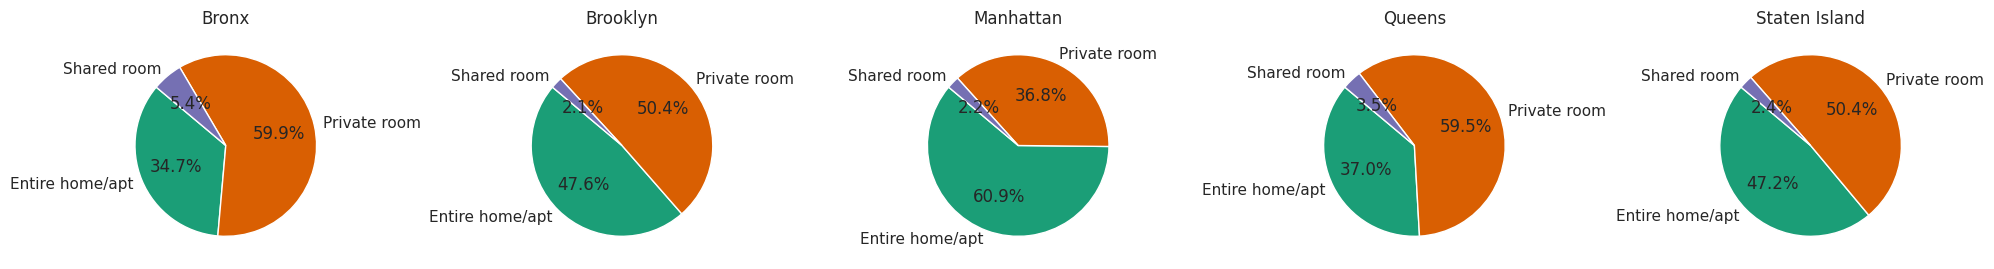

In [69]:
# Group the data by neighbourhood_group and room_type, then calculate the count for each group
room_type_counts = airbnb_df_new.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Create a pie chart for each neighbourhood group
fig, axs = plt.subplots(ncols=len(room_type_counts), figsize=(20, 20))

# Plot pie charts for each neighbourhood group
for ax, (neighbourhood_group, counts) in zip(axs, room_type_counts.iterrows()):
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.palettes.mpl_palette('Dark2'))
    ax.set_title(neighbourhood_group)

plt.tight_layout()
plt.show()



This image consists of a series of pie charts, each representing the distribution of Airbnb listing types (shared room, private room, and entire home/apartment) in different boroughs of New York City (Bronx, Brooklyn, Manhattan, Queens, and Staten Island).

Bronx: The majority of listings in the Bronx are private rooms (59.9%), followed by entire home/apartments (34.7%) and shared rooms (5.4%).
Brooklyn: Brooklyn has a relatively even distribution of listing types, with private rooms being the most common (50.4%), followed closely by entire home/apartments (47.6%) and shared rooms (2.1%).
Manhattan: In Manhattan, the majority of listings are entire home/apartments (60.9%), followed by private rooms (36.8%) and shared rooms (2.3%).
Queens: Similar to the Bronx, Queens also has a majority of private rooms (59.5%), followed by entire home/apartments (37.0%) and shared rooms (3.5%).
Staten Island: Staten Island's listing distribution is similar to Brooklyn, with private rooms being the most common (50.4%), followed by entire home/apartments (47.2%) and shared rooms (2.4%).
Overall, the pie charts provide a visual representation of how the distribution of Airbnb listing types varies across different boroughs of New York City.

# **Conclusion**

####In conclusion, successfully analyzed Airbnb NYC data using Python and Numerical Programming, uncovering key insights that can drive improvements in the hospitality industry. This project showcases the power of data analysis in understanding customer behavior and making informed business decisions.